In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = make_classification(n_samples=10000,
                           n_features=5,
                           n_informative=4,
                           n_redundant=1,
                           n_classes=2,
                           random_state=1)

In [3]:
x, y = data

In [4]:
df = pd.DataFrame(x)
df['label'] = y
df.head()

,0,1,2,3,4,label
0,-1.570975,0.447255,-1.174231,-0.941227,2.197147,0
1,-1.784429,-0.845947,0.207517,1.760687,0.464294,0
2,-0.970863,1.086770,-0.677413,-1.162227,2.019015,0
3,0.980308,1.364978,-1.567916,-3.307415,2.740155,1
4,-3.875288,-1.556021,-4.570991,-2.187211,2.769401,1


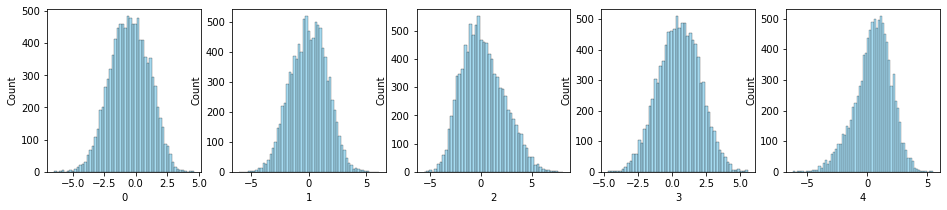

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for idx, ax in enumerate(axs):
    sns.histplot(df.loc[:,idx], ax=ax, color="skyblue")

In [6]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [7]:
x_train

array([[-0.44051926,  0.43283232,  0.80475495,  0.80314694,  0.56287983],
       [ 0.2193854 , -0.38384727, -0.82070362, -0.71567594,  1.23038839],
       [ 0.20824321,  0.77360754,  2.0097316 ,  1.6030048 , -0.39992205],
       ...,
       [-1.1440716 , -0.1201797 ,  1.01216428,  1.80364788,  0.07202322],
       [-1.45832105,  0.04490019,  1.52547197,  2.4001372 , -0.43080403],
       [-1.01463715,  2.39844985,  0.83123211, -0.43734893,  2.4362778 ]])

In [8]:
model = xgb.XGBClassifier(use_label_encoder=False)
eval_set = [(x_test, y_test)]
model.fit(x_train, y_train,
          early_stopping_rounds=10, # improve at least once during 10 rounds
          eval_metric='logloss',
          eval_set=eval_set, 
          verbose=False);

In [9]:
preds_train = model.predict(x_train)
accuracy_score(y_train, preds_train)

0.9625

In [10]:
preds_test = model.predict(x_test)
accuracy_score(y_test, preds_test)

0.9385

# feature importance

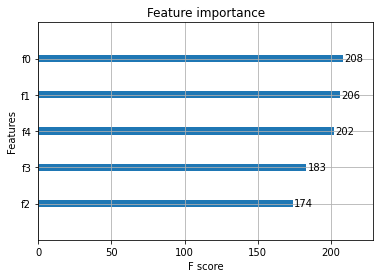

In [11]:
xgb.plot_importance(model);